In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-5-40821fc33ee0>:45: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-40821fc33ee0>:45: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-40821fc33ee0>:45: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-40821fc33ee0>:45: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-40821fc33ee0>:45: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-40821fc33ee0>:45: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-40821fc33ee0>:45: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-inp

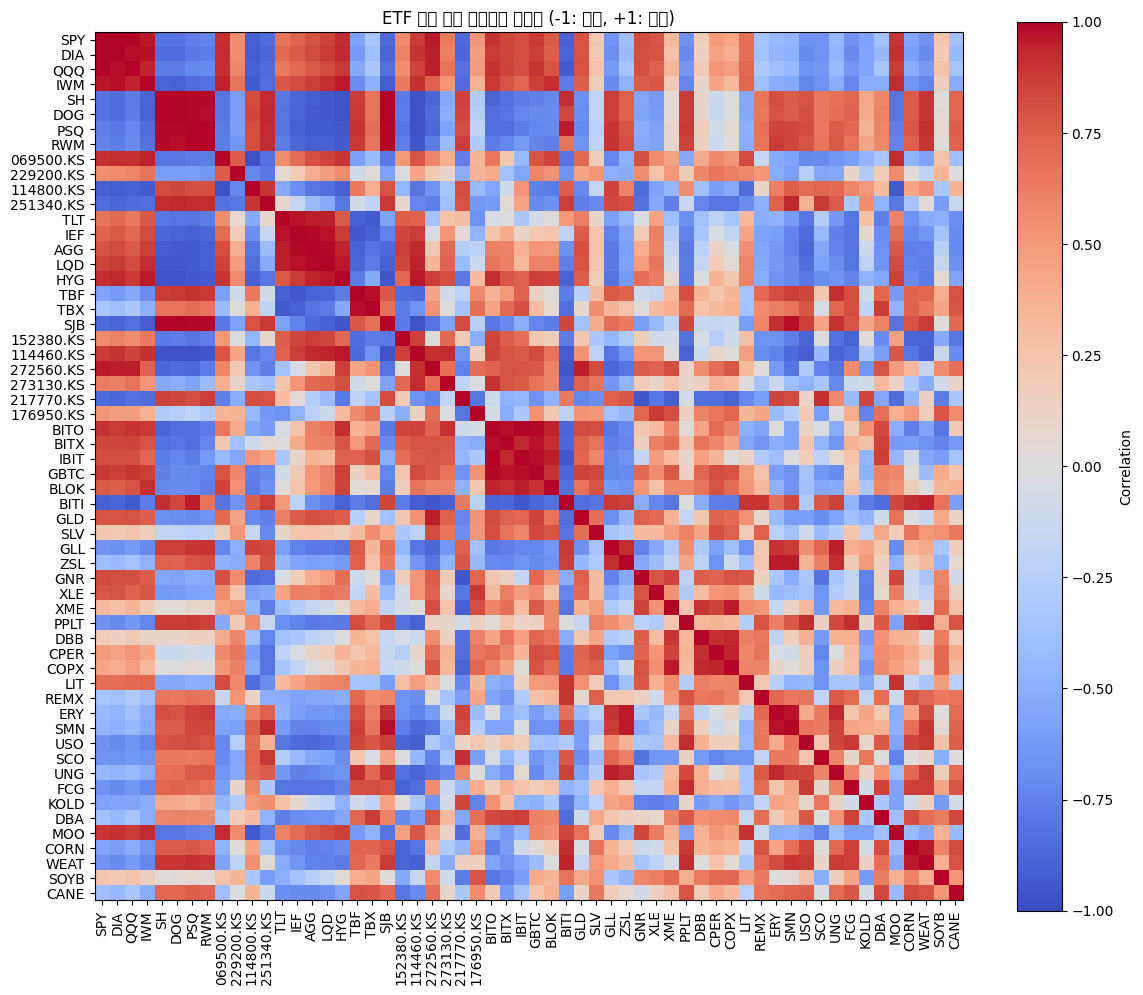


📊 상관계수 -0.1 ~ 0.1인 종목쌍 (거의 무상관):

        Ticker1    Ticker2  Correlation
3160       CORN       IBIT    -0.094064
908         LQD        XME    -0.090793
1390  273130.KS       SOYB    -0.089906
2424       CPER        SMN    -0.087966
2951        FCG       KOLD    -0.085512
2589       REMX        XLE    -0.084025
1197  152380.KS        XLE    -0.081918
3169       CORN        XLE    -0.079956
3048        DBA        GLD    -0.079930
1385  273130.KS       KOLD    -0.079225
539   229200.KS        TBF    -0.078135
1351  273130.KS        TBF    -0.076802
1694       GBTC        TLT    -0.075505
3342       CANE        GNR    -0.073131
655   251340.KS        TBF    -0.072731
3183       CORN       KOLD    -0.069517
1431  217770.KS       PPLT    -0.068327
3357       CANE       KOLD    -0.066481
2384       CPER        PSQ    -0.065584
1198  152380.KS        XME    -0.065557
1476  176950.KS       BITO    -0.056946
1200  152380.KS        DBB    -0.052138
1520       BITO        TLT    -0.050803
1289 

In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# ✅ 생략 없이 모든 행 출력 설정
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# 티커 목록 불러오기
tickers_df = pd.read_csv("/content/drive/MyDrive/Data/FNC/Tickers4CL-ETF.csv")
tickers = tickers_df["[Symbol]"].dropna().unique()

# 종가 수집
DATA_DIR = "/content/drive/MyDrive/Data/FNC/Historical_Data"
price_df = pd.DataFrame()

for ticker in tickers:
    file_path = os.path.join(DATA_DIR, f"{ticker}.csv")
    if os.path.exists(file_path):
        try:
            df = pd.read_csv(file_path, parse_dates=["Date"])
            df = df[["Date", "Close"]].dropna()
            df.set_index("Date", inplace=True)
            price_df[ticker] = df["Close"]
        except Exception as e:
            print(f"{ticker} 처리 중 오류: {e}")
    else:
        print(f"{ticker}.csv 파일 없음")

# 상관계수 행렬 계산
correlation_matrix = price_df.corr(method="pearson")

# 히트맵 시각화
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(label="Correlation")

tick_marks = range(len(correlation_matrix.columns))
plt.xticks(tick_marks, correlation_matrix.columns, rotation=90)
plt.yticks(tick_marks, correlation_matrix.columns)

plt.title("ETF 종가 기반 상관관계 히트맵 (-1: 빨강, +1: 파랑)")
plt.tight_layout()
plt.show()

# 상관계수 -0.1 ~ 0.1 사이인 종목쌍 출력
corr_pairs = correlation_matrix.stack().reset_index()
corr_pairs.columns = ["Ticker1", "Ticker2", "Correlation"]
corr_pairs = corr_pairs[corr_pairs["Ticker1"] < corr_pairs["Ticker2"]]
low_corr = corr_pairs[(corr_pairs["Correlation"] >= -0.1) & (corr_pairs["Correlation"] <= 0.1)]

# ✅ 생략 없이 전체 행 출력
print("\n📊 상관계수 -0.1 ~ 0.1인 종목쌍 (거의 무상관):\n")
print(low_corr.sort_values(by="Correlation"))


<ipython-input-14-10c53481a823>:32: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-10c53481a823>:32: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-10c53481a823>:32: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-10c53481a823>:32: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-10c53481a823>:32: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-10c53481a823>:32: UserWarning: Glyph 50630 (\N{HANGUL SYLLABLE EOBS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-10c53481a823>:32: UserWarning: Glyph 45716 (\N{HANGUL SYLLABLE NEUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ip

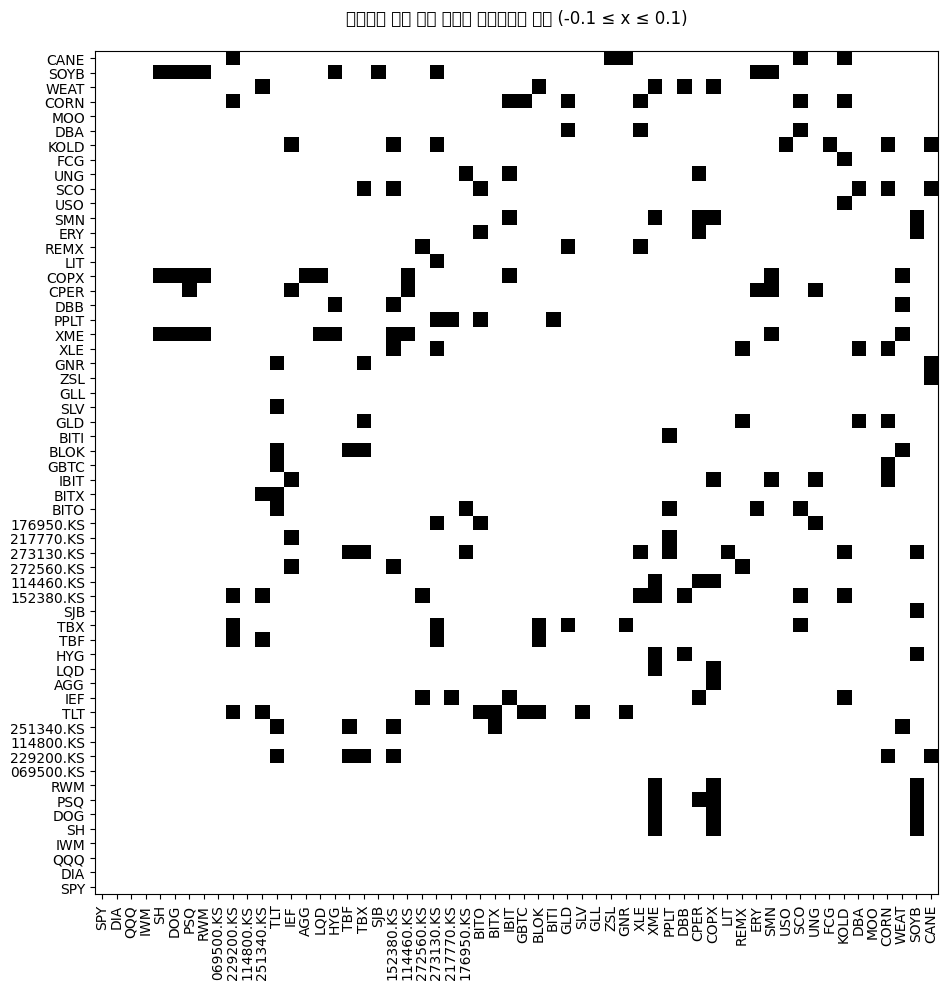

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 조건: |corr| ≤ 0.1 → 검정, 나머지 → 흰색
binary_matrix = correlation_matrix.copy()
binary_matrix[(binary_matrix > 0.1) | (binary_matrix < -0.1)] = np.nan  # 유의미한 것들 NaN 처리
binary_matrix[(binary_matrix >= -0.1) & (binary_matrix <= 0.1)] = 1  # 무의미한 것들 1로 표시

# 마스크 적용: NaN은 흰색, 1은 검정
masked_array = np.ma.masked_invalid(binary_matrix.values)

# 단색 컬러맵 정의 (1 → 검정, NaN → 흰색)
from matplotlib.colors import ListedColormap
bw_cmap = ListedColormap(["black"])  # 단일 색상

# 그리기
fig, ax = plt.subplots(figsize=(12, 10))
ax.set_facecolor("white")  # 배경 흰색

c = ax.imshow(masked_array, cmap=bw_cmap, interpolation="none")

# 축 라벨
tick_labels = correlation_matrix.columns
ax.set_xticks(np.arange(len(tick_labels)))
ax.set_yticks(np.arange(len(tick_labels)))
ax.set_xticklabels(tick_labels, rotation=90)
ax.set_yticklabels(tick_labels)
ax.invert_yaxis()

# 제목
plt.title("상관관계 거의 없는 구간만 검정색으로 표시 (-0.1 ≤ x ≤ 0.1)", pad=20)
plt.tight_layout()
plt.show()